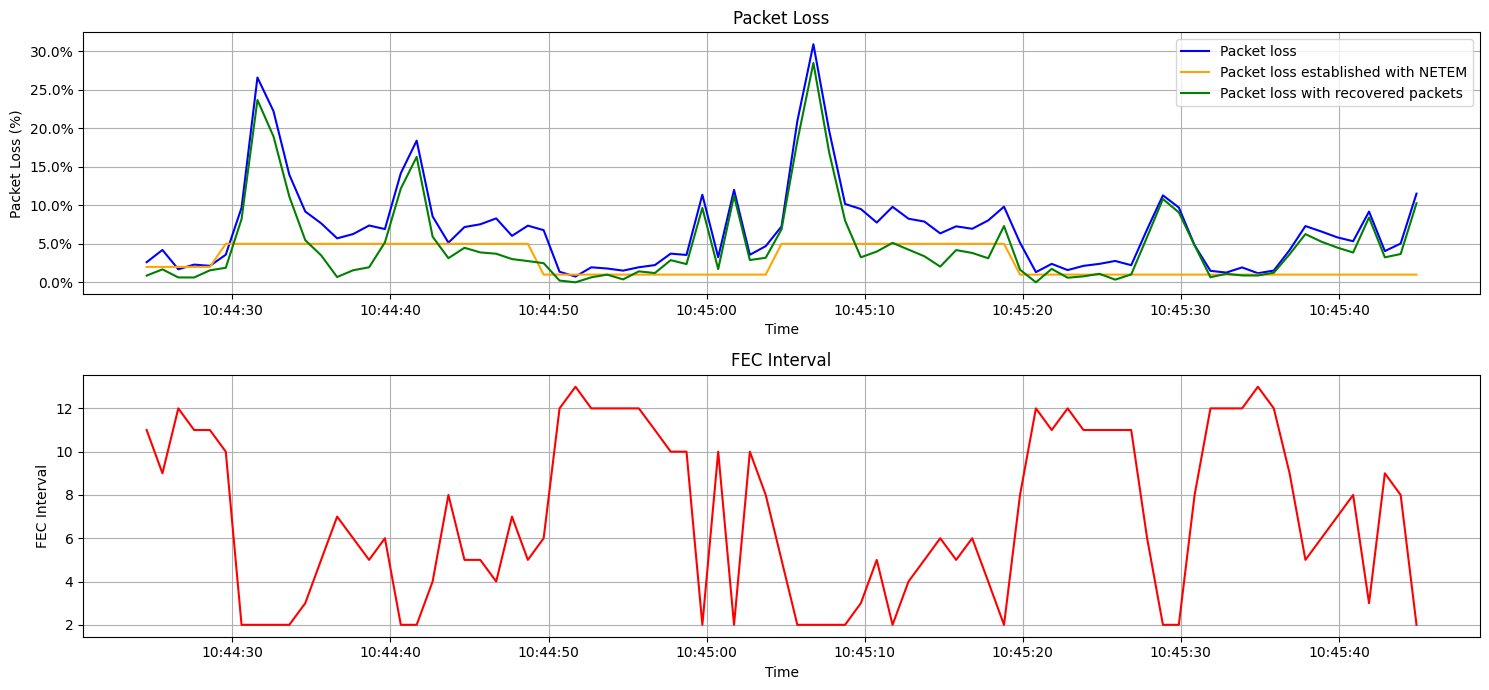

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import PercentFormatter

data = pd.read_csv('../report/sender_packets.csv')

data['Time'] = pd.to_datetime(data['Time'], unit='ms')
mask = data['Recovery Rate'] > 1
data.loc[mask, 'Recovery Rate'] = np.random.uniform(0.9, 1, size=mask.sum())

plt.figure(figsize=(15, 7))

plt.subplot(2, 1, 1)
plt.plot(data['Time'], data['Packet loss'], label='Packet loss', color='blue')
plt.plot(data['Time'], data['Packet loss Random'], label='Packet loss established with NETEM', color='orange')
plt.plot(data['Time'], data['Packet loss with recovery'], label='Packet loss with recovered packets', color='green')
plt.title('Packet Loss')
plt.xlabel('Time')
plt.legend()
plt.ylabel('Packet Loss (%)')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.grid(True)

# plt.gca().set_yticklabels(['{:.0f}%'.format(x * 100) for x in plt.gca().get_yticks()])

plt.subplot(2, 1, 2)
plt.plot(data['Time'], data['FEC Interval'], color='r')
plt.title('FEC Interval')
plt.xlabel('Time')
plt.ylabel('FEC Interval')
plt.grid(True)

# plt.subplot(2, 2, 3)
# plt.plot(data['Time'], data['Recovery Rate'], color='g')
# plt.title('Recovery Rate')
# plt.xlabel('Time')
# plt.ylabel('Recovery Rate')
# plt.ylim(0, 1)

# plt.subplot(2, 2, 4)
# plt.plot(data['Time'], data['Bandwidth'], color='purple')
# plt.title('Bandwidth')
# plt.xlabel('Time')
# plt.ylabel('Bandwidth')

plt.tight_layout()
plt.show()

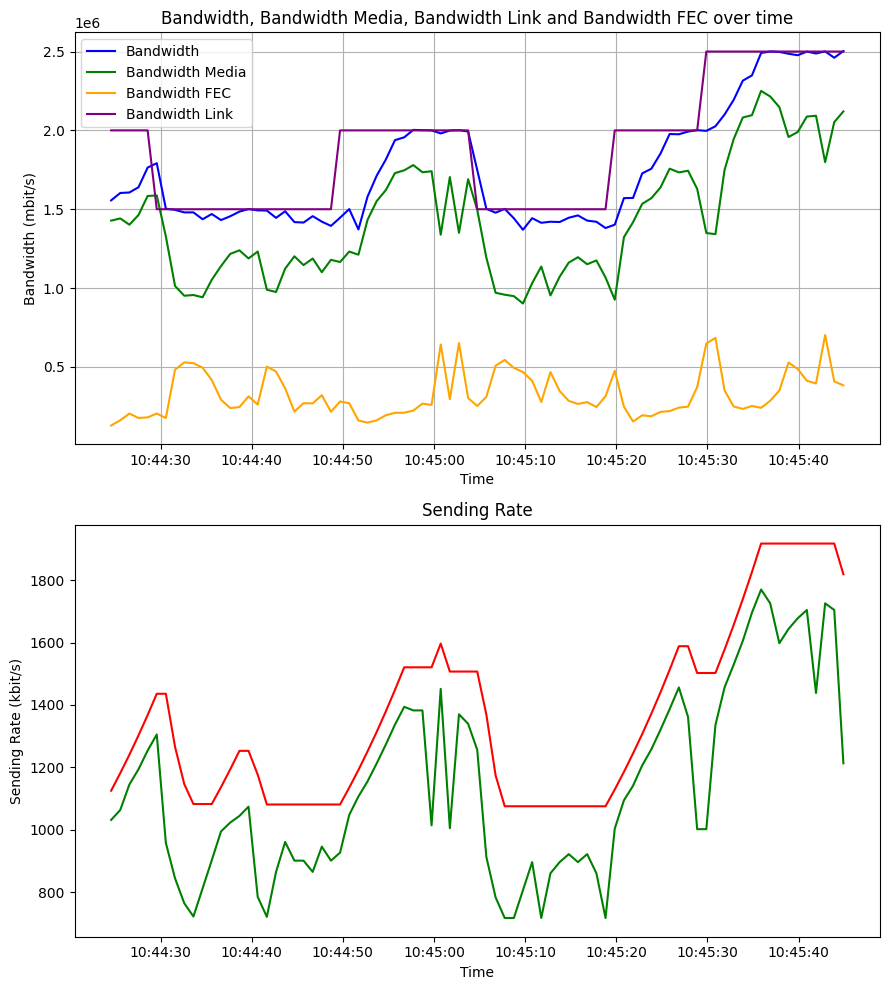

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Загрузка данных из CSV-файла
data = pd.read_csv('../report/sender_packets.csv')

# Вычисление Bandwidth FEC
data['Bandwidth FEC'] = data['Bandwidth'] - data['Bandwidth Media']
data['Time'] = pd.to_datetime(data['Time'], unit='ms')


# Построение графика
plt.figure(figsize=(9, 10))

plt.subplot(2, 1, 1)
plt.plot(data['Time'], data['Bandwidth'], label='Bandwidth', color='blue')
plt.plot(data['Time'], data['Bandwidth Media'], label='Bandwidth Media', color='green')
plt.plot(data['Time'], data['Bandwidth FEC'], label='Bandwidth FEC', color='orange')
plt.plot(data['Time'], data['Bandwidth Link'], label='Bandwidth Link', color='purple')
plt.title('Bandwidth, Bandwidth Media, Bandwidth Link and Bandwidth FEC over time')
plt.xlabel('Time')
plt.ylabel('Bandwidth (mbit/s)')
plt.legend()
plt.grid(True)

data['Sending Rate'] = data['Sending Rate'] / 3
data['Video bitrate'] = data['Video bitrate'] / 3

plt.subplot(2, 1, 2)
plt.plot(data['Time'], data['Sending Rate'], color='red')
plt.plot(data['Time'], data['Video bitrate'], color='green')

plt.title('Sending Rate')
plt.xlabel('Time')
plt.ylabel('Sending Rate (kbit/s)')

plt.tight_layout()
plt.show()

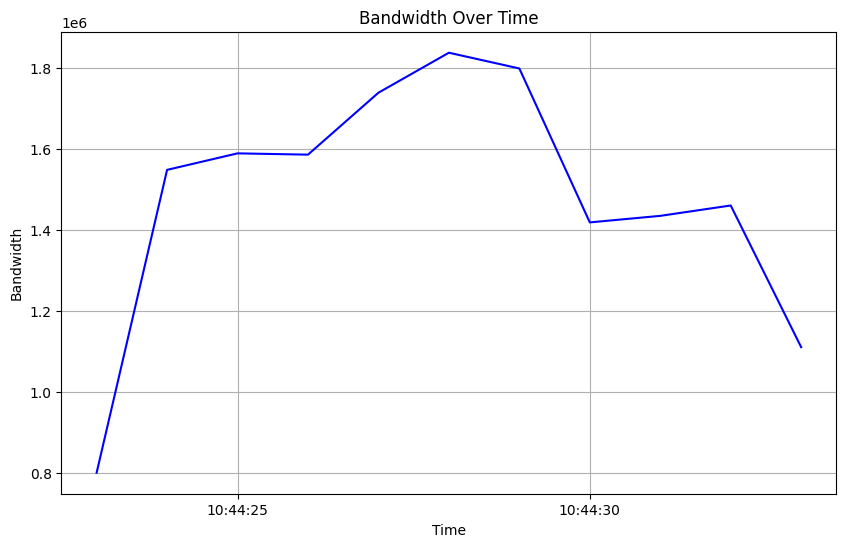

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('../report/received_packets.csv')

data.drop(columns=['Type'], inplace=True)

data['Time'] = pd.to_datetime(data['Time'], unit='ms')

bandwidth_data = data.resample('S', on='Time').sum()

plt.figure(figsize=(10, 6))
plt.plot(bandwidth_data.index, bandwidth_data['Size'], color='b')
plt.title('Bandwidth Over Time')
plt.xlabel('Time')
plt.ylabel('Bandwidth')
plt.grid(True)
plt.show()

In [11]:
import subprocess

# video_path = '../received_video.flv'
# video_path = '../test.mp4'
video_path = '../6075_shibuya_tokyo_japan_170111052TokyoIlluminatedSigns1080p.mp4'
# video_path = '../IMG_3821.MOV'

ffprobe_command = f'ffprobe -v error -select_streams v:0 -show_entries frame=pict_type -of csv=p=0 {video_path}'
result = subprocess.run(ffprobe_command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

if result.returncode == 0:
    print(result.stdout)
    frames = result.stdout.decode().strip().split('\r\n')
    frame_counts = {'I': 0, 'P': 0, 'B': 0}

    for frame in frames:
        if frame == 'I':
            frame_counts['I'] += 1
        elif frame == 'P':
            frame_counts['P'] += 1
        elif frame == 'B':
            frame_counts['B'] += 1

    print('Количество I-фреймов:', frame_counts['I'])
    print('Количество P-фреймов:', frame_counts['P'])
    print('Количество B-фреймов:', frame_counts['B'])
else:
    print('Произошла ошибка при выполнении команды ffprobe:')
    print(result.stderr.decode().strip())

b'I\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nI\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nI\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nB\r\nP\r\nB\r\nP\r\nI\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nI\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nI\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nI\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nI\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r\nB\r\nB\r\nB\r\nP\r